# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [27]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

In [6]:
from fractions import Fraction

# Total number of fruits in the basket
total_fruits = 100

# Number of apples and oranges
num_apples = 60
num_oranges = 40

# Probability of picking an apple
p = Fraction(num_apples, total_fruits)

# Probability of picking an orange
q = Fraction(num_oranges, total_fruits)

# Output the probabilities
print(f"Probability of picking an apple (p): {p}")
print(f"Probability of picking an orange (q): {q}")

Probability of picking an apple (p): 3/5
Probability of picking an orange (q): 2/5


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [10]:
from fractions import Fraction

# Given probabilities for apple and orange
p_apple = Fraction(60, 100)  # Probability of picking an apple as a fraction
p_orange = Fraction(40, 100)  # Probability of picking an orange as a fraction

# First question: Probability that the first 5 fruits are all apples
p_5_apples = p_apple ** 5
print(f"Probability that the first 5 fruits are all apples: {p_5_apples}")

# Second question: Probability that the first 5 fruits are all apples and the next 15 fruits are all oranges
p_5_apples_and_15_oranges = p_apple ** 5 * p_orange ** 15
print(f"Probability that the first 5 fruits are all apples and the next 15 fruits are all oranges: {p_5_apples_and_15_oranges}")

Probability that the first 5 fruits are all apples: 243/3125
Probability that the first 5 fruits are all apples and the next 15 fruits are all oranges: 7962624/95367431640625


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [13]:
from math import comb
from fractions import Fraction

# Given probabilities for apple and orange
p_apple = Fraction(60, 100)  # Probability of picking an apple as a fraction
p_orange = Fraction(40, 100)  # Probability of picking an orange as a fraction

# Parameters for binomial distribution
n = 20  # Total number of fruits
k = 5   # Number of apples

# Binomial coefficient (n choose k)
binomial_coeff = comb(n, k)

# Probability of exactly 5 apples and 15 oranges
p_5_apples_15_oranges = binomial_coeff * (p_apple ** k) * (p_orange ** (n - k))

print(f"Probability of exactly 5 apples and 15 oranges: {p_5_apples_15_oranges}")

Probability of exactly 5 apples and 15 oranges: 123452522496/95367431640625


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [15]:
from math import comb
from fractions import Fraction

# Given probabilities for apple and orange
p_apple = Fraction(60, 100)  # Probability of picking an apple as a fraction
p_orange = Fraction(40, 100)  # Probability of picking an orange as a fraction

# Parameters for binomial distribution
n = 20  # Total number of fruits

# Function to calculate binomial probability P(X = k)
def binomial_prob(n, k, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Calculate CDF for X < 5 (i.e., P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4))
cdf_less_than_5 = sum(binomial_prob(n, k, p_apple) for k in range(5))

print(f"Probability that fewer than 5 fruits picked are apples: {cdf_less_than_5}")

Probability that fewer than 5 fruits picked are apples: 30234443776/95367431640625


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [ ]:
# your code here
# Please label the axes and give a title to the plot 

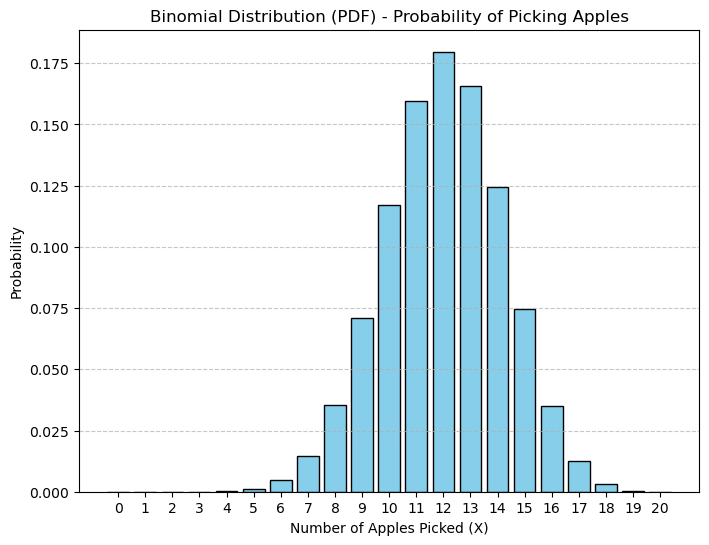

In [17]:
import matplotlib.pyplot as plt
from math import comb
from fractions import Fraction

# Given probabilities for apple and orange
p_apple = Fraction(60, 100)  # Probability of picking an apple as a fraction
p_orange = Fraction(40, 100)  # Probability of picking an orange as a fraction

# Parameters for binomial distribution
n = 20  # Total number of fruits

# Function to calculate binomial probability P(X = k)
def binomial_prob(n, k, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Calculate the binomial probabilities for each k from 0 to n
x_values = range(n + 1)
y_values = [binomial_prob(n, k, p_apple) for k in x_values]

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
plt.title("Binomial Distribution (PDF) - Probability of Picking Apples")
plt.xlabel("Number of Apples Picked (X)")
plt.ylabel("Probability")
plt.xticks(x_values)  # Show all x-values (0 to n)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [21]:
import math
from fractions import Fraction

# Given values
lambda_value = 2.3  # average number of goals per match
k = 5  # number of goals we are interested in

# Poisson probability mass function: P(X = k)
poisson_prob = (lambda_value ** k) * math.exp(-lambda_value) / math.factorial(k)

# Convert the decimal result to a fraction
poisson_prob_fraction = Fraction(poisson_prob).limit_denominator()

print(f"Probability that exactly 5 goals are scored in a match: {poisson_prob_fraction}")

Probability that exactly 5 goals are scored in a match: 37784/702631


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [ ]:
# your code here
# Please label the axes and give a title to the plot 

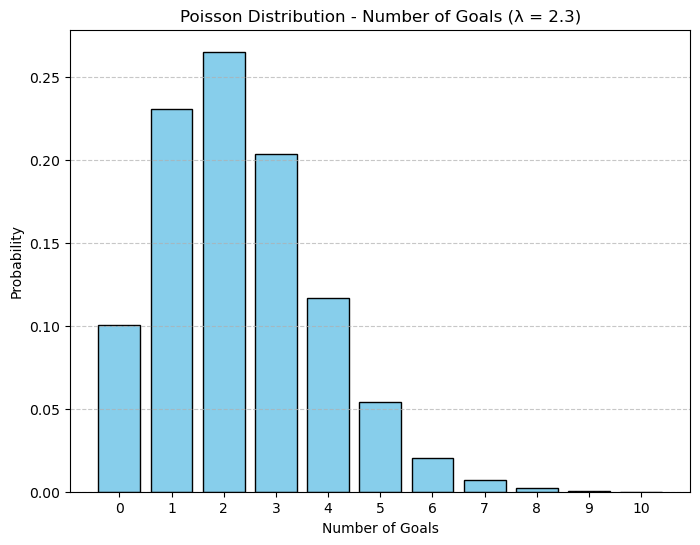

In [23]:
import math
import matplotlib.pyplot as plt

# Given values
lambda_value = 2.3  # average number of goals per match
k_values = range(0, 11)  # Goals from 0 to 10

# Function to calculate Poisson probability
def poisson_prob(k, lambda_value):
    return (lambda_value ** k) * math.exp(-lambda_value) / math.factorial(k)

# Calculate the Poisson probabilities for each value of k
probabilities = [poisson_prob(k, lambda_value) for k in k_values]

# Plot the Poisson distribution
plt.figure(figsize=(8, 6))
plt.bar(k_values, probabilities, color='skyblue', edgecolor='black')
plt.title("Poisson Distribution - Number of Goals (λ = 2.3)")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.xticks(k_values)  # Show all x-values (0 to 10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()